# Processamento de Imagem (RGB e Operações Clássicas)

*Ultima modificação em em 2025-08-26*

Este notebook  organiza e documenta seu conteúdo original, adicionando seções temáticas e
comentários didáticos. Cada seção explica **o objetivo**, **quando usar** e **armadilhas comuns**.  
Os blocos de código foram preservados e precedidos de um resumo rápido do que fazem.

## Importações

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

import utils as ut

## Codigo

### Leitura da imagem

In [2]:
IMG_PATH = Path("tchoro.jpg")

image = cv.imread(str(IMG_PATH), cv.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError(f"Não consegui ler o arquivo: {IMG_PATH.resolve()}")

print("Imagem carregada com sucesso!")

Imagem carregada com sucesso!


### Análise exploratória

In [3]:
ut.eda_image(image)

Largura em pixels: 960
Altura em pixels: 960
Quantidade de pixels: 921600
Quantidade de elementos presentes na matriz: 2764800
Quantidade de canais: 3


In [4]:
# Pixel na coordenada [0,0] = canto superior esquerdo
# Retorna uma tupla (B, G, R) porque o OpenCV usa a ordem de canais BGR.
print("Tupla correspondente ao pixel [0,0] - ", end='')
print(image[0, 0])

Tupla correspondente ao pixel [0,0] - [116 113 109]


In [5]:
# Mostra a imagem 
cv.imshow("Janela da image", image)
cv.waitKey(0) # Precisa desse trecho se não, não vai funcionar

-1

### Canais de cor (BGR no OpenCV) 
* Em uma **imagem colorida**, cada **pixel** é representado por uma **tupla de 3 valores inteiros** (0–255). 
* Cada valor corresponde à **intensidade** de um dos **canais de cor**. 
* **Atenção:** no **OpenCV** a ordem é **BGR** (Blue, Green, Red), e não RGB como é comum em outras bibliotecas. 

Exemplo: Se o pixel `[0,0]` retornar a tupla `(28, 28, 34)`, isso significa: 
* Azul (B) = 28* Azul (G) = 28
* Azul (R) = 34

#### Criando matrizes para isolar canais 
* Vamos criar **3 matrizes tridimensionais** (altura × largura × canais), todas inicialmente preenchidas com zeros. 
* Essas matrizes terão **o mesmo tamanho da imagem original**, mas só receberão valores em **um único canal**: 
  * `blueChannel` → somente intensidades de azul (canal 0) 
  * `greenChannel` → somente intensidades de verde (canal 1) 
  * `redChannel` → somente intensidades de vermelho (canal 2)

In [6]:
blueChannel = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.uint8)
greenChannel = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.uint8)
redChannel = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=np.uint8)

#### Preenchimento dos canais 
* Percorremos todos os pixels da imagem (`image[:,:, :]`) e copiamos apenas o valor referente ao canal desejado. 
* Nos outros canais, mantemos o valor **zero** (preto). 
* Isso faz com que ao exibir cada matriz, vejamos **a contribuição isolada de cada cor**. Exemplo visual esperado: 
  * **Canal Azul:** regiões azuladas ficam mais claras, o restante tende a preto. 
  * **Canal Verde:** regiões verdes se destacam. 
  * **Canal Vermelho:** regiões avermelhadas ficam mais intensas.”

**Exemplo prático:** Suponha que o resultado ao imprimir o pixel `[0,0]` foi: `[28 28 34]` 

Isso significa: * **B(0) = 28** * **G(1) = 28** * **R(2) = 34**”

In [7]:
blueChannel[:,:,0] = image[:,:,0]
greenChannel[:,:,1] = image[:,:,1]
redChannel[:,:,2] = image[:,:,2]

In [8]:
cv.imshow("Canal azul", blueChannel)
cv.imshow("Canal verde", greenChannel)
cv.imshow("Canal vermelho", redChannel)
cv.waitKey(0)

-1

##### Extra

Isso foi um extra que fiz testando o que aconteceria caso eu somasse os 3. O resultado foi a imagem original

In [9]:
recreatedImage = blueChannel+greenChannel+redChannel

In [10]:
cv.imshow("Imagem recriada", recreatedImage)
cv.waitKey(0)

-1

### Tornando a imagem em escala de cinza
Agora, em vez de visualizar os canais separadamente (azul, verde e vermelho), vamos fundir a contribuição de todos eles em uma única intensidade de cinza.
* Criamos uma matriz 2D (altura × largura) chamada grayChannel, que armazena apenas um valor por pixel.
* Esse valor corresponde à média aritmética dos três canais (B, G, R).
* Ou seja, cada pixel deixa de ter 3 números (um para cada cor) e passa a ter apenas 1 número (0–255) representando sua tonalidade em cinza.

In [11]:
grayChannel = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(image.shape[0]):      # percorre as linhas (altura)
    for j in range(image.shape[1]):  # percorre as colunas (largura)
        # Média simples dos três canais (B+G+R)/3
        grayChannel[i, j] = (image[i, j].sum() // 3)

cv.imshow("Imagem recriada", grayChannel)
cv.waitKey(0)

-1

## Histograma da imagem
O histograma de uma imagem mostra a distribuição da intensidade dos pixels.
* No eixo x: valores de intensidade (0–255).
* No eixo y: quantidade de pixels que possuem aquela intensidade.

#### Interpretação:
* Imagem com pouco contraste → histograma concentrado em uma faixa estreita de valores.
* Imagem com muito contraste → histograma mais espalhado, cobrindo quase toda a faixa (0–255).

#### Explicação resumida
1. Criamos uma lista com 256 posições (uma para cada intensidade possível de pixel).
2. Percorremos todos os pixels da imagem:
3. Se for imagem em cinza, incrementamos diretamente a posição correspondente.
4. Se for imagem colorida, escolhemos o canal desejado (0=Azul, 1=Verde, 2=Vermelho).
5. Retornamos essa lista como o histograma do canal.

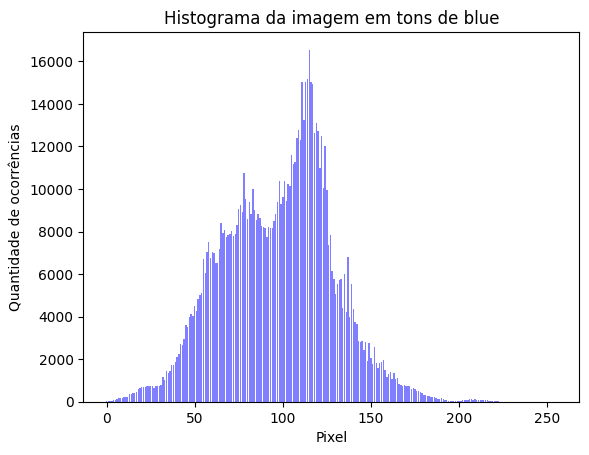

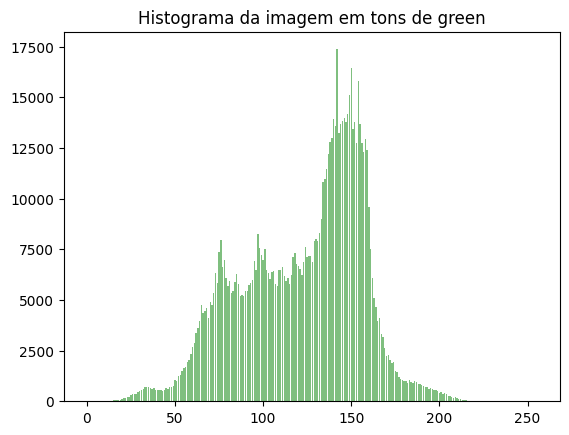

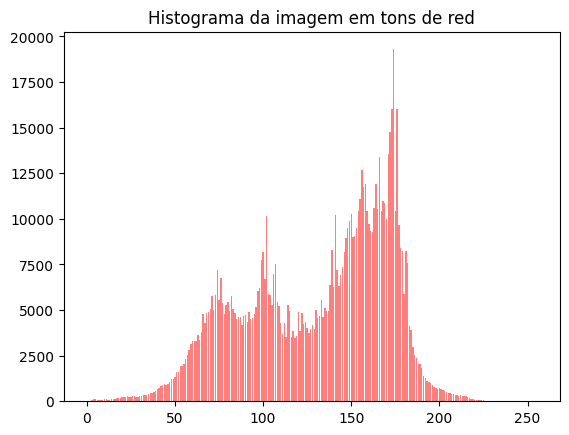

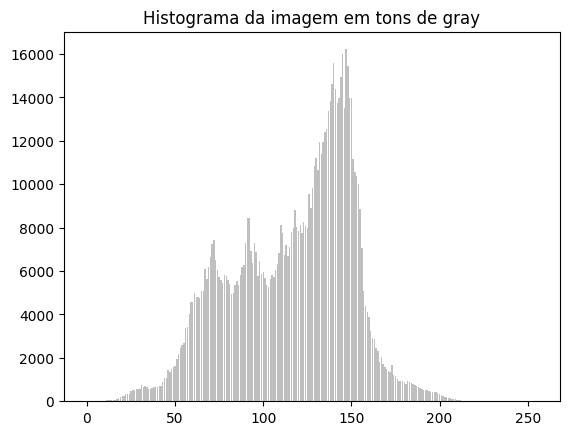

In [12]:
pixel = 256*[0]

for i in range(256):
    pixel[i] = i
    
colors = ['blue', 'green', 'red', 'gray']
channels = {'blue': [blueChannel, 0], 'green': [greenChannel, 1], 'red': [redChannel, 2], 'gray': [grayChannel, None]}
 
plt.xlabel('Pixel')
plt.ylabel('Quantidade de ocorrências')

for color in colors:
    plt.title(f'Histograma da imagem em tons de {color}')
    plt.bar(pixel, ut.histograma(channels[color][0], channels[color][1]), color=color.lower(), alpha=0.5, label=color)
    plt.show()